<a href="https://colab.research.google.com/github/gabrielsinger2/Perso_Experiments/blob/main/Challenge_SINGER_ELMY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data quality check

In [3]:
X_train=pd.read_csv('/content/X_train_Wwou3IE.csv')
Y_train=pd.read_csv('/content/y_train_jJtXgMX.csv')

Analyse de X_train

In [4]:
X_train.head()

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN


In [5]:
X_train.describe()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
count,9318.000000,10604.000000,10604.000000,10604.000000,10581.000000,10581.000000,10581.000000,10581.000000,1846.000000
mean,53725.132968,2819.781592,11463.220671,35393.282252,4512.989415,1919.281353,125.399422,24.997384,140.256024
std,11274.194929,495.103588,483.799154,7619.820162,3349.419356,2706.963383,132.152875,43.083977,33.922669
min,30515.000000,1646.000000,9769.000000,22285.000000,592.000000,0.000000,1.830211,0.000000,42.420000
25%,45336.500000,2226.000000,11140.000000,29005.000000,2036.000000,0.000000,46.818974,0.000000,119.405000
50%,51846.000000,2806.000000,11487.000000,32470.000000,3319.000000,149.000000,86.700163,3.507229,140.040000
75%,62091.750000,3386.000000,11945.000000,43055.000000,5951.000000,3507.000000,155.325644,35.137019,160.765000
max,85145.000000,3391.000000,11963.000000,50122.000000,15167.000000,10127.000000,1871.571992,745.261316,254.190000


'Nan values processing'

In [6]:
X_train.isnull().sum() #plot the nbr of nan values per col

,0
DELIVERY_START,0
load_forecast,1287
coal_power_available,1
gas_power_available,1
nucelear_power_available,1
wind_power_forecasts_average,24
solar_power_forecasts_average,24
wind_power_forecasts_std,24
solar_power_forecasts_std,24
predicted_spot_price,8759


In [7]:
print("Distribution of missing values in the train data set:")
X_train.isnull().mean()

Distribution of missing values in the train data set:


,0
DELIVERY_START,0.000000
load_forecast,0.121358
coal_power_available,0.000094
gas_power_available,0.000094
nucelear_power_available,0.000094
wind_power_forecasts_average,0.002263
solar_power_forecasts_average,0.002263
wind_power_forecasts_std,0.002263
solar_power_forecasts_std,0.002263
predicted_spot_price,0.825931


The predicted spot price has $82.5\%$ of missing values...so I decided to errase this column from the dataset and then drop nan values, other wise it would drop $82.5\%$ of the dataset.

In [8]:
X_train.drop('predicted_spot_price', inplace=True, axis=1)
X_train.columns

Index(['DELIVERY_START', 'load_forecast', 'coal_power_available',
       'gas_power_available', 'nucelear_power_available',
       'wind_power_forecasts_average', 'solar_power_forecasts_average',
       'wind_power_forecasts_std', 'solar_power_forecasts_std'],
      dtype='object')

In [9]:
X_na_free=X_train.dropna()
only_na = X_train[~X_train.index.isin(X_na_free.index)]

In [10]:
dropped_train_index=only_na.index

In [11]:
X_train=X_na_free #Rename

In [12]:
X_train.isnull().sum() #check that there is no missing value anymore


,0
DELIVERY_START,0
load_forecast,0
coal_power_available,0
gas_power_available,0
nucelear_power_available,0
wind_power_forecasts_average,0
solar_power_forecasts_average,0
wind_power_forecasts_std,0
solar_power_forecasts_std,0


In [13]:
X_train.dtypes #check the dtypes

,0
DELIVERY_START,object
load_forecast,float64
coal_power_available,float64
gas_power_available,float64
nucelear_power_available,float64
wind_power_forecasts_average,float64
solar_power_forecasts_average,float64
wind_power_forecasts_std,float64
solar_power_forecasts_std,float64


Notice that we have not categorical variable (since dtype: int64)

Do we have any absurd value in our dataset ?
Since all the the features are positives, let's check if we have negatives one ?

In [14]:
#saving the columns name into a list
X_train_column_names=list(X_train.columns)
Y_train_column_names=list(Y_train.columns)

In [15]:
X_train_column_names

['DELIVERY_START',
 'load_forecast',
 'coal_power_available',
 'gas_power_available',
 'nucelear_power_available',
 'wind_power_forecasts_average',
 'solar_power_forecasts_average',
 'wind_power_forecasts_std',
 'solar_power_forecasts_std']

In [16]:
for word in X_train[X_train_column_names[0]][:]:
  plus_pos=word.index('+')
  word=word[:plus_pos]
def errase_plus(word):
  plus_pos=word.index('+')
  return word[:plus_pos]

In [17]:
#the method apply allow us to apply a function pointwisely to a pd column
X_train['DELIVERY_START']=X_train['DELIVERY_START'].apply(errase_plus)

In [18]:
pip install pretty_errors

In [19]:
import pretty_errors

In [20]:
X_train['DELIVERY_START'] = pd.to_datetime(X_train['DELIVERY_START'], errors='coerce')

In [21]:
X_train['DELIVERY_START']

,DELIVERY_START
0,2022-01-01 02:00:00
1,2022-01-01 03:00:00
2,2022-01-01 04:00:00
3,2022-01-01 05:00:00
4,2022-01-01 06:00:00
...,...
10600,2023-03-29 19:00:00
10601,2023-03-29 20:00:00
10602,2023-03-29 21:00:00
10603,2023-03-29 22:00:00


In [22]:

X_train['year']=X_train['DELIVERY_START'].dt.year
X_train['month']=X_train['DELIVERY_START'].dt.month
X_train['day']=X_train['DELIVERY_START'].dt.day
X_train['hour']=X_train['DELIVERY_START'].dt.hour

Analyse de Y_train

In [23]:
Y_train.head()

,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907


In [24]:
Y_train.dtypes

,0
DELIVERY_START,object
spot_id_delta,float64


In [25]:
Y_train.isnull().sum() #plot the nbr of nan values per col

,0
DELIVERY_START,0
spot_id_delta,0


In [26]:
Y_na_free=Y_train.drop(dropped_train_index)

In [27]:
Y_na_free.describe()

,spot_id_delta
count,9269.000000
mean,0.534166
std,35.581449
min,-1567.353547
25%,-10.754733
50%,0.227333
75%,11.463592
max,383.900709


In [28]:
Y_train=Y_na_free #Rename

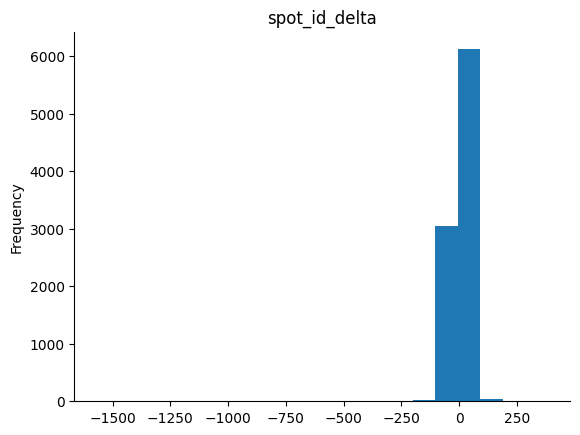

In [29]:
# @title spot_id_delta
from matplotlib import pyplot as plt
Y_train['spot_id_delta'].plot(kind='hist', bins=20, title='spot_id_delta')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [30]:
N=(Y_train['spot_id_delta']<=0).sum() #Number of negatif delta
len_y_train_total=len(Y_train['spot_id_delta'])
print(f'Il y a {(N/len_y_train_total)*100} % de delta (intra-spot) de prix negatifs. La méthode benchmark proposée n est donc pas optimale')

Il y a 49.34728665443953 % de delta (intra-spot) de prix negatifs. La méthode benchmark proposée n est donc pas optimale


In [31]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 12.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d15d8f2d36f47294556b144a9e9595d9eaea60f0538fdd262398d3f56f86bcad
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [32]:
import ydata_profiling
from ydata_profiling import ProfileReport

In [33]:
#profile_train=ProfileReport(X_train)

In [34]:
#profile_train

Prediction

In [35]:
#model1: random forest since we have tabular data and romdom forest are good candidates for this
from sklearn.ensemble import RandomForestRegressor

In [36]:
X_train_column_names=X_train.columns

In [37]:
X_train.drop(X_train_column_names[0], axis=1, inplace=True) #

In [38]:
Y_train.head()

,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907


In [39]:
Y_train_column_names[0]

'DELIVERY_START'

In [40]:
Y_train.drop(Y_train_column_names[0], inplace=True, axis=1)

In [41]:
X_train

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,year,month,day,hour
0,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,2022,1,1,2
1,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,2022,1,1,3
2,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,2022,1,1,4
3,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,2022,1,1,5
4,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,2022,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10600,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,2023,3,29,19
10601,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,2023,3,29,20
10602,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,2023,3,29,21
10603,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,2023,3,29,22


In [42]:
X_train.shape[0]

9269

In [43]:
l=X_train.shape[0]
X_train[:int(0.8*l)]
X_train[int(0.8*l):] #8726

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,year,month,day,hour
8727,61968.0,3386.0,11945.0,46265.0,12535.0,190.0,145.025282,9.405503,2023,1,9,17
8728,66515.0,3386.0,11945.0,46265.0,12025.0,0.0,165.885185,0.000000,2023,1,9,18
8729,67106.0,3386.0,11945.0,46265.0,11470.0,0.0,155.850506,0.000000,2023,1,9,19
8730,63007.0,3386.0,11945.0,46265.0,10756.0,0.0,94.159182,0.000000,2023,1,9,20
8731,59382.0,3386.0,11945.0,46265.0,10009.0,0.0,102.956251,0.000000,2023,1,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...
10600,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,2023,3,29,19
10601,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,2023,3,29,20
10602,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,2023,3,29,21
10603,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,2023,3,29,22


In [44]:
int(0.8*l)

7415

In [45]:
#data set splitting
l=X_train.shape[0]
X_train_train=X_train[:int(0.8*l)] #len first rows
Y_train_train=Y_train[:int(0.8*l)] #len first rows

In [46]:
X_train_test=X_train[int(0.8*l):]
Y_train_test=Y_train[int(0.8*l):]

In [47]:
#Random forest regression
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train_train,Y_train_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=5, random_state=0)

In [48]:
Y_res_train_test=pd.DataFrame(regr.predict(X_train_test), index=Y_train_test.index)

In [49]:
Y_res_train_test.rename(columns={Y_res_train_test.columns[0]: Y_train_test.columns[0]}, inplace=True) #inplace=True avoid to create a new variable

In [50]:
Y_train_test.columns[0]

'spot_id_delta'

In [50]:
Y_res_train_test

,spot_id_delta
8727,-1.255492
8728,-1.255492
8729,-1.255492
8730,-1.255492
8731,-1.255492
...,...
10600,-3.218694
10601,-3.193517
10602,-3.140122
10603,-3.193517


In [ ]:
Prediction_error=Y_train_test-Y_res_train_test

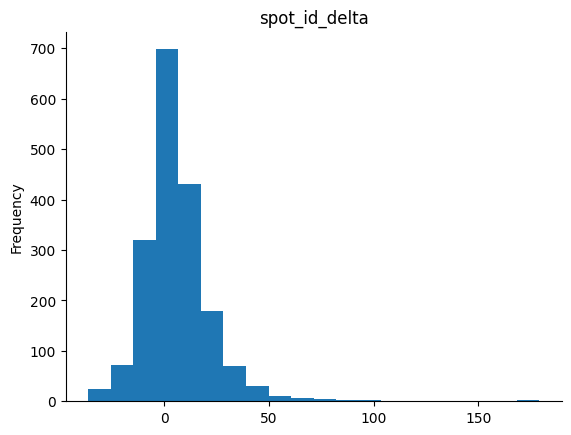

In [ ]:
# @title prediction spot
from matplotlib import pyplot as plt
Prediction_error['spot_id_delta'].plot(kind='hist', bins=20, title='spot_id_delta')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sign=pd.concat([Y_train_test,Y_res_train_test], axis=1) #axis=1 to have two columns
sign

,spot_id_delta,spot_id_delta
8727,-3.359515,-1.255492
8728,-2.937183,-1.255492
8729,12.234100,-1.255492
8730,4.873007,-1.255492
8731,12.190489,-1.255492
...,...,...
10600,6.029303,-3.218694
10601,13.576177,-3.193517
10602,17.478945,-3.140122
10603,17.559407,-3.193517


In [ ]:
sign.columns[1]

'spot_id_delta'

In [ ]:
sign.columns=["True_spot", "Predicted_spot"]
#sign.rename(columns={sign.columns[0]: "True_spot", sign.columns[1]: "Predicted_spot"}, inplace=True)

In [ ]:
sign

,True_spot,Predicted_spot
8727,-3.359515,-1.255492
8728,-2.937183,-1.255492
8729,12.234100,-1.255492
8730,4.873007,-1.255492
8731,12.190489,-1.255492
...,...,...
10600,6.029303,-3.218694
10601,13.576177,-3.193517
10602,17.478945,-3.140122
10603,17.559407,-3.193517


In [ ]:
number_of_good_sign_pred=(np.sign(sign['True_spot'])==np.sign(sign['Predicted_spot'])).sum()
print(f'The number of good sign of delta spot predicted reprensents {np.round(number_of_good_sign_pred/sign.shape[0],2)} percent of training test set.')

The number of good sign of delta spot predicted reprensents 0.43 percent of training test set.


In [51]:
#lib to save ML models
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler

In [52]:
def scale_data_train_test(pandaframe_train,pandaframe_test):
  scale=StandardScaler() #scalling process
  #X_train
  X_train_scaled=scale.fit_transform(pandaframe_train)
  pd_X_train_scaled=pd.DataFrame(X_train_scaled, index=pandaframe_train.index)
  pd_X_train_scaled.columns=pandaframe_train.columns
  #X_test
  X_test_scaled=scale.transform(pandaframe_test)#We use the same mean and std as for test data
  pd_X_test_scaled=pd.DataFrame(X_test_scaled, index=pandaframe_test.index)
  pd_X_test_scaled.columns=pandaframe_test.columns
  return pd_X_train_scaled,pd_X_test_scaled

In [53]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [54]:
def evaluation_metric(x,y):
  return np.abs(x-y)+np.abs(np.sign(x)-np.sign(y))

In [55]:
np.sign(-3)

-1

In [56]:
def identity_function(x):
  return x
def best_depth_value(range_depth, X_train, X_test, Y_train, Y_test, metric="sum"):
  List_of_good_sign_pred=[]
  models={}
  for k in range_depth:
    print(f'Etape {k}:')#Indication of the steps
    regr = RandomForestRegressor(max_depth=k, random_state=0) #model

  #regr.fit(X_train_train,Y_train_train) #fit the model with not scaled data
    regr.fit(X_train,Y_train)

  #models[f'model {k}']=regr
  #dump(regr, f'model_{k}.joblib')

    Y_res_train_test=pd.DataFrame(regr.predict(X_test),
                                index=Y_test.index) #generate the predicted column

    Y_res_train_test.rename(columns={Y_res_train_test.columns[0]: Y_test.columns[0]},
                          inplace=True) #inplace=True avoid to create a new variable
    if metric=="sign":
      sign=pd.concat([Y_test,Y_res_train_test],
                 axis=1) #axis=1 to have two columns

      sign.columns=["True_spot", "Predicted_spot"]

      number_of_good_sign_pred=(np.sign(sign['True_spot'])==np.sign(sign['Predicted_spot'])).sum()
      List_of_good_sign_pred.append(number_of_good_sign_pred)
    if metric=="sum":
      metric_value=evaluation_metric(Y_test,Y_res_train_test).sum()
      List_of_good_sign_pred.append(metric_value)
  return List_of_good_sign_pred

In [57]:
#with scaled data
values_of_depth=[k for k in range(1,100)]
X_tts,X_t_tests=scale_data_train_test(X_train_train, X_train_test)


In [ ]:
#List_of_good_sign_pred=best_depth_value(values_of_depth, X_tts, X_t_tests
                                       # , Y_train_train, Y_train_test)

Etape 1:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Etape 2:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Etape 3:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [ ]:
plt.figure('Number of correct sign predicted versus depth of the random forest')
plt.xlabel("depth")
plt.ylabel("N")
plt.plot([k for k in values_of_depth],List_of_good_sign_pred)
a=np.array(List_of_good_sign_pred)
index_of_max=np.where(a==a.min())[0][0]
plt.axvline(x=index_of_max, color="red")

In [ ]:
a.min()

In [ ]:
print(f'The best depth for sign prediction seems to be {values_of_depth[index_of_max]}.')

In [58]:
def predicted_random_optimal_scaled(range_depth=[k for k in range(12,20)],
                                    X_train=X_tts, X_test=X_t_tests, Y_train=Y_train_train,
                                    Y_test=Y_train_test):
  "Args: was Y_train=Y_tts and Y_test=Y_t_tests"
  "Return: predicted values and predicted score"
  List_of_good_sign_pred=best_depth_value(range_depth, X_train, X_test, Y_train, Y_test)
  a=np.array(List_of_good_sign_pred)
  optimal_index=np.where(a==a.max())[0][0]
  #define the model with the optimal depth
  optimal_forest=RandomForestRegressor(max_depth=range_depth[optimal_index])
  #fit the model (with scaled data it's better in our case)
  optimal_forest.fit(X_train,Y_train)
  #make the prediction
  Y_predicted=optimal_forest.predict(X_test)
  return pd.DataFrame(Y_predicted, index=Y_train_test.index)

In [59]:
def number_of_good_sign(y_pred,y_given):
  #since y_pred comes from randomeforest regressos it is an array
  #we need to put into pd with same index as y_given
  Y_Pred=pd.DataFrame(y_pred, index=y_given.index)

  #Gathering into one dataframe
  sign=pd.concat([Y_Pred,y_given], axis=1) #axis=1 to have two columns
  #rename columns
  sign.columns=["True_spot", "Predicted_spot"]
  #count the number of values with the same sign
  number_of_good_sign_pred=(np.sign(sign['True_spot'])==np.sign(sign['Predicted_spot'])).sum()
  #print the answer
  print(f'The number of good sign of delta spot predicted reprensents {100*np.round(number_of_good_sign_pred/sign.shape[0],2)} percent of training test set.')

In [ ]:
#Y_predicted=predicted_random_optimal_scaled()
#number_of_good_sign(Y_predicted, Y_train_test)

**Results**:
We have noticed that if data set training and test are scaled we have the number of good sign predicted that increase (52% versus 49%).

Here, we only have studied the variation of one parameter, the forest's depth. Howere there are a lots of other hyperparameters in RandomForest class (number of node, randome states, mnimum number of samples required to split a node etc)
Let's use Grid research to find the best optimal values for those hyperparameters

In [ ]:
X_tts.columns.shape

In [ ]:
[k for k in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [60]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [2,3,4],
    'max_features': [k for k in range(1,4)],
    'min_samples_leaf': [4],
    'min_samples_split': [7, 8, 9],
    'n_estimators': [120, 130, 135]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 150}

In [ ]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_tts, Y_train_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

In [ ]:
#best parameters found
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
models={}
models[f'model{3}']=grid_search.best_estimator_
dump(grid_search.best_estimator_, f'model_{2}.joblib')

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
best_grid = grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
y_grid=best_grid.predict(X_t_tests)

NameError: name 'best_grid' is not defined

In [ ]:
Y_train_test

,spot_id_delta
5897,-36.767554
5898,-27.871465
5899,-11.048670
5900,-42.087933
5901,-48.443357
...,...
10600,6.029303
10601,13.576177
10602,17.478945
10603,17.559407


In [ ]:
plt.figure()
plt.plot(Y_train_test.index, y_grid, label="predicted")
plt.plot(Y_train_test.index,Y_train_test, label="test")
plt.legend()
plt.show()

NameError: name 'y_grid' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
number_of_good_sign(y_grid,Y_train_test)

NameError: name 'number_of_good_sign' is not defined

RandomForest+LinearRegression (stacking model)
Will it improve the prediction ?


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler


In [62]:
import multiprocessing

In [63]:
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

In [64]:
X_tts,X_t_tests=scale_data_train_test(X_train_train, X_train_test)

In [86]:
print("Parallel Parameter optimization")
X,y=X_train_train, Y_train_train #Xgb data args
    # Make sure the number of threads is balanced.
xgb_model = xgb.XGBRegressor(
        n_jobs=multiprocessing.cpu_count() // 2, tree_method="hist"
    )
clf_1 = GridSearchCV(
        xgb_model,
        {"max_depth": [k for k in range(20,30)],
         "n_estimators": [300+k for k in range(-1,5)]},
        verbose=1,
        n_jobs=2,
    )
clf_1.fit(X, y)
print(clf_1.best_score_)
print(clf_1.best_params_)

Parallel Parameter optimization
Fitting 5 folds for each of 60 candidates, totalling 300 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-86-d983d0fbbd56>", line 14, in <cell line: 14>
    clf_1.fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1019, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1573, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 965, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 74, in __call__
    return super().__call__(it

TypeError: object of type 'NoneType' has no len()

scaled : {'max_depth': 21, 'n_estimators': 299}
not scale: {'max_depth': 21, 'n_estimators': 299}

In [66]:
X_t_tests.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,year,month,day,hour
8727,0.858333,1.237462,1.089779,1.508092,2.424851,-0.625956,0.118756,-0.371891,6.251486,-1.395151,-0.743407,0.791358
8728,1.260946,1.237462,1.089779,1.508092,2.270728,-0.701386,0.271182,-0.599204,6.251486,-1.395151,-0.743407,0.935892
8729,1.313275,1.237462,1.089779,1.508092,2.103006,-0.701386,0.197857,-0.599204,6.251486,-1.395151,-0.743407,1.080425
8730,0.950331,1.237462,1.089779,1.508092,1.887233,-0.701386,-0.252930,-0.599204,6.251486,-1.395151,-0.743407,1.224959
8731,0.629357,1.237462,1.089779,1.508092,1.661488,-0.701386,-0.188648,-0.599204,6.251486,-1.395151,-0.743407,1.369492


In [67]:
y_pred=clf_1.predict(X_train_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [68]:
Y_train.shape[0]==X_train.shape[0]

True

In [69]:
#Fitting with all the X_train
model=xgb.XGBRegressor(max_depth=21, n_estimators=299)
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=21, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=299, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
X_train.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,year,month,day,hour
0,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,2022,1,1,2
1,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,2022,1,1,3
2,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,2022,1,1,4
3,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,2022,1,1,5
4,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,2022,1,1,6


In [71]:
x_test=pd.read_csv('/content/X_test_GgyECq8(1).csv')
x_test.head()
delivery=pd.read_csv('/content/X_test_GgyECq8(1).csv')[pd.read_csv('/content/X_test_GgyECq8(1).csv').columns[0]]

In [72]:
delivery

,DELIVERY_START
0,2023-04-02 00:00:00+02:00
1,2023-04-02 01:00:00+02:00
2,2023-04-02 02:00:00+02:00
3,2023-04-02 03:00:00+02:00
4,2023-04-02 04:00:00+02:00
...,...
4937,2023-10-24 19:00:00+02:00
4938,2023-10-24 20:00:00+02:00
4939,2023-10-24 21:00:00+02:00
4940,2023-10-24 22:00:00+02:00


In [73]:
x_test.drop('predicted_spot_price', inplace=True, axis=1)
x_test['DELIVERY_START'] = pd.to_datetime(x_test['DELIVERY_START'], errors='coerce')
x_test['year']=x_test['DELIVERY_START'].dt.year
x_test['month']=x_test['DELIVERY_START'].dt.month
x_test['day']=x_test['DELIVERY_START'].dt.day
x_test['hour']=x_test['DELIVERY_START'].dt.hour

In [74]:
x_test.dropna()
x_test.drop(x_test.columns[0], inplace=True, axis=1)
x_test.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,year,month,day,hour
0,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,2023,4,2,0
1,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,2023,4,2,1
2,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,2023,4,2,2
3,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,2023,4,2,3
4,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,2023,4,2,4


In [75]:
y_final_predict=model.predict(x_test)
y_final_pd=pd.DataFrame(y_final_predict)

In [76]:
y_final_pd.head(22)

,0
0,-2.212066
1,-2.442286
2,0.460026
3,0.333941
4,1.130651
5,1.846718
6,2.126595
7,1.542281
8,0.442416
9,-1.493345


In [77]:
y_final=pd.concat([delivery,y_final_pd], axis=1)

In [78]:
y_final.rename(columns={y_final.columns[0]:"DELIVERY_START",
                        y_final.columns[1]:"id_spot_delta"}, inplace=True)

In [79]:
y_final.head(24)

,DELIVERY_START,id_spot_delta
0,2023-04-02 00:00:00+02:00,-2.212066
1,2023-04-02 01:00:00+02:00,-2.442286
2,2023-04-02 02:00:00+02:00,0.460026
3,2023-04-02 03:00:00+02:00,0.333941
4,2023-04-02 04:00:00+02:00,1.130651
5,2023-04-02 05:00:00+02:00,1.846718
6,2023-04-02 06:00:00+02:00,2.126595
7,2023-04-02 07:00:00+02:00,1.542281
8,2023-04-02 08:00:00+02:00,0.442416
9,2023-04-02 09:00:00+02:00,-1.493345


In [96]:
x_test.index

RangeIndex(start=0, stop=4942, step=1)

In [99]:
y_final.reset_index(drop=True, inplace=True)

In [80]:
y_exemple=pd.read_csv('/content/y_random_pt8afo8(3).csv')

In [91]:
X_train.shape[0]-x_test.shape[0]

4327

In [87]:
#format
def format_concours(prediction):
  y_exemple=pd.read_csv('/content/y_random_pt8afo8(3).csv')
  y_exemple[y_exemple.columns[1]]=prediction[prediction.columns[1]]

  y_save=y_exemple.to_csv('Y_TEST.csv', index=False)

In [1]:
y_final.index


NameError: name 'y_final' is not defined

In [101]:
y_final.to_csv('final_xbg_index.csv', index=True)

In [ ]:
y_pred.shape

(4635,)

In [ ]:
len(X_tts.index)

4634

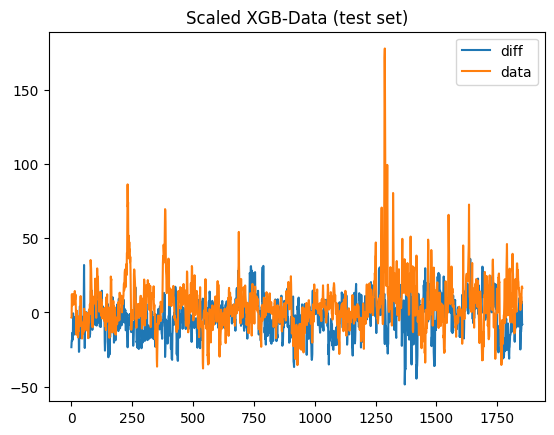

In [ ]:
plt.figure()
plt.title('Scaled XGB-Data (test set)')
abs=X_tts.index
plt.plot([k for k in range(y_pred.shape[0])], (y_pred), label='diff')
plt.plot([k for k in range(y_pred.shape[0])], Y_train_test.values, label='data')
plt.legend()
plt.show()

In [ ]:
y_train_test_reshape=Y_train_test.values.reshape(1,-1)[0]